<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/TensorFlow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [64]:
# load the dataset
(X_train, y_train), (X_test, y_test) = \
    keras.datasets.fashion_mnist.load_data()

**cf. Dataset in TensorFlow, PyTorch**  
**Dataset**이란 X(features)와 y(label)이 함께 포함된 형태를 의미한다.  
(위 cell)따라서 (X_train, y_train)과 같이 지정하면 알아서 X_train에는 X가, y_train에는 y가 보관된다.

**cf. `\`의 사용**  
References. [PEP 8 - Style Guide for Python Code](https://peps.python.org/pep-0008/)  

The Python standard library is conservative and requires **limiting lines to 79 characters** (and docstrings/comments to 72).  
**Backslashes(\\)** may still be appropriate at times. For example, long, multiple with-statements could not use implicit continuation before Python 3.10, so backslashes were acceptable for that case:  
```python
with open('/path/to/some/file/you/want/to/read') as file_1, \
     open('/path/to/some/file/being/written', 'w') as file_2:
    file_2.write(file_1.read())
```

In [65]:
# check the shape and type of X, y
print(f'X_train: Shape {X_train.shape} Type {type(X_train)}, y_train: Shape {y_train.shape} Type {type(y_train)}')
print(f'X_test: Shape {X_test.shape} Type {type(X_test)}, y_test: Shape {y_test.shape} Type {type(y_test)}')

X_train: Shape (60000, 28, 28) Type <class 'numpy.ndarray'>, y_train: Shape (60000,) Type <class 'numpy.ndarray'>
X_test: Shape (10000, 28, 28) Type <class 'numpy.ndarray'>, y_test: Shape (10000,) Type <class 'numpy.ndarray'>


In [66]:
# 만약 sample 수가 너무 많고, y가 continuous value라면,
# np.unique()에 리소스 소모가 클 수 있으므로 먼저 5개만 출력
print(y_train[:5]) # Output: [9 0 0 3 0]
# y가 dicrete인 것을 확인 후에 np.unique() 리턴
print(np.unique(y_train)) # Output: [0 1 2 3 4 5 6 7 8 9]

[9 0 0 3 0]
[0 1 2 3 4 5 6 7 8 9]


In [67]:
# check the labels count
from collections import Counter

# label_counter: Counter({9: 6000, 0: 6000, ..., 4: 6000, 8: 6000}) NO SORTED
label_counter = Counter(y_train)

# x[0]은 Key 기준, x[1]은 Value 기준 정렬
# reverse=False이면 ascending, reverse=True이면 descending
print(sorted(label_counter.items(), key=lambda x: x[0], reverse=False))

[(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]


In [68]:
# Logistic Regression

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

X_train_scaled = (X_train / 255.0).reshape(-1, 28*28)

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(estimator=sc,
                        X=X_train_scaled, y=y_train,
                        return_train_score=True,
                        n_jobs=-1)

train_score = np.mean(scores['train_score'])
test_score = np.mean(scores['test_score'])
print(f'train_score: {train_score}, test_score: {test_score}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


train_score: 0.8308250000000001, test_score: 0.8196000000000001


In [69]:
# cf. 컴퓨터는 28pixel * 28pixel을 그림으로 이해하지 못한다
# 따라서 .reshape(-1, 28*28)을 통해서 784pixel의 1-dim으로 만든다
# 따라서 60,000개의 이미지는 각각 784개의 x_j값을 가진 데이터 인스턴스이다
X_train_scaled.shape

(60000, 784)

**cf. 위 cell 이어서**  
input: $x^i_j$에 대해서 $i = 0, 1, ..., 59999$ 그리고 $j = 0, 1, ..., 783$  
output: $z_k$에 대해서 $k = 0, 1, ..., 9$  

$x^i$에 대한 $z_k = \Sigma^{783}_{i=0}{(w_{ki}*x_{i})} + b_k$이다.  
* 동일한 $x_i$에 대한 weight라고 하더라도, $z_k$에 따라 weight값이 다르기 때문에 $w_{ki}$라고 표현함.
* 마찬가지로 bias값도 $z_k$에 달라지므로 $b_k$라고 표현함.

$z_k$ 자체는 continuous이며, 이를 $softmax$ function에 통과시킨 값은 다음과 같다.  
* $0<=softmax(z_k)<=1$ 그리고 $\Sigma{softmax(z_k)}=1$

* 즉 각 class에 속할 확률이 된다.

즉 Input Node는 784개이고, Output Node는 10개임. 이 과정을 (X_train_scaled 60,000개 기준) 60,000번 수행하는 것임.

* * *
Deep Learning 분야의 데이터셋은 충분히 크기 때문에 validation score가 안정적이고, cross-validate를 하기에는 시간이 오래 걸리기 때문에 1개의 validation set으로만 검증한다.

In [70]:
# Split train set into train set and validate set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled,
                                                  y_train,
                                                  test_size=0.2,
                                                  stratify=y_train,
                                                  random_state=42)

print(f'X_train: Shape {X_train.shape} Type {type(X_train)}, y_train: Shape {y_train.shape} Type {type(y_train)}')
print(f'X_val: Shape {X_val.shape} Type {type(X_val)}, y_val: Shape {y_val.shape} Type {type(y_val)}')

X_train: Shape (48000, 784) Type <class 'numpy.ndarray'>, y_train: Shape (48000,) Type <class 'numpy.ndarray'>
X_val: Shape (12000, 784) Type <class 'numpy.ndarray'>, y_val: Shape (12000,) Type <class 'numpy.ndarray'>


In [71]:
# Create the Dense layer
dense = keras.layers.Dense(units=10, # 다음 neuron(node) 수
                           activation='softmax',
                           input_shape=(784,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**cf. Keras Dense layer**  
References. [Keras 3 API documentation](https://keras.io/api/layers/core_layers/dense/)  

* **units**: Positive integer, dimensionality of the output space.
    - input layer - output layer 바로 연결되기 때문에 다음 node의 수는 10개(label 종류)
* **activation**: Activation function to use. If you don't specify anything, no activation is applied (i.e. a(x) = x)

In [72]:
# Create the Model
model = keras.models.Sequential()
model.add(dense)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

**cf. `model.summary()` 결과 해석**  

**Output Shape**  
* (Batch_size, \*Output_Dimensions)
* 본 예제에서는 Batch_size 없으므로 `None`

**Total params**  
* 해당 layer를 통과하는 parameter 수
* 각 data instance는 784(=28*28) 개의 $x_j$를 가지고 있으므로, $w_j$ 또한 이에 대응하여 784개가 존재함.
* bias 1개를 추가하면 785개임.
* 이때 layer와 연결된 output node가 10개이므로, 785 * 10 = 7,850임.

**Trainable params**  
* 말 그대로, 학습 가능한(= 업데이트 가능한) parameters
* 표에서 **Param #**에 해당함.

**Non-trainable params**  
(지금 수준에서는 알 필요 없다고 판단됨)
* case1. pre-trained model의 일부 layer를 freeze하여 학습 중에 update되지 않도록 설정
* case2. 특정 parameter를 고정하여 학습 과정에서 변경되지 않도록 설정
* case3. `moving mean` 및 `moving variance`와 같은 통계값은 학습 불가능한 parameter로 간주됨.

In [75]:
# Compile the model
# model training 전에 기타 설정을 함
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'])

# cf. 'sparse_categorical_crossentropy'
# 다중분류 손실함수인 'categorical_crossentropy'는 one-hot encoding필요
# sprase는 one-hot encoding 하지 않아도 가능하도록 해주는 tensorflow 함수
# 바람직하지 않은 방법이지만, 실습이므로 그대로 진행함

**cf. `model.compile()`**  
references. [tf.keras.Model.compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model?_gl=1*iz7k9n*_up*MQ..*_ga*NjI0NTAyODA0LjE3MjI5NTYwNzg.*_ga_W0YLR4190T*MTcyMjk1NjA3Ny4xLjAuMTcyMjk1NjA3Ny4wLjAuMA..#compile)  
> Configures the model for training.  
즉 엄밀히 말하자면 compile보다는 configure가 적절하다.  
위에서는 모델에 대한 layer, activation function 등을 설정했고, 여기서는 optimizer, loss function 등을 설정한다.

```python
# 해당 parameter value들은 default value
compile(
    optimizer='rmsprop', # 아래에서 설명
    loss=None, # 아래에서 설명
    loss_weights=None, # 무시
    metrics=None, # 아래에서 설명
    weighted_metrics=None, # 무시
    run_eagerly=False, # 무시
    steps_per_execution=1, # 무시
    jit_compile='auto', # 무시
    auto_scale_loss=True # 무시
)
```

* **optimizer**: 최적화 함수. 종류는 [여기](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes)를 참고.
* **loss**: 손실 함수. 종류는 [여기](https://www.tensorflow.org/api_docs/python/tf/keras/losses#classes)를 참고.
* **metrics**: 평가 지표. 종류는 [여기](https://www.tensorflow.org/api_docs/python/tf/keras/metrics#classes)를 참고.
    - **`keras`**에서는 기본적으로 epoch마다 loss 값을 출력한다. 이때 loss 값 외에도 추가적인 평가 지표를 출력하기를 원할 때 해당 parameter를 사용할 수 있다.

In [80]:
# Fitting the model
train_epochs = 5
# model.fit()은 기본적으로 epoch마다 loss값을 출력해준다
# 그리고 출력해주지 않는 부가 정보들도 model.fit() 객체에 담긴다
# 따라서 이 정보들을 이용하기 위해 history라는 변수에 보관하는 것이 바람직한 습관
history = model.fit(X_train, y_train,
                    batch_size=None,
                    verbose=2,
                    epochs=train_epochs)

# cf. 또한 train_val을 사실 위에서 미리 만들지 않고,
# model fitting할 때 설정할 수 있다.
# model.fit(...,  validation_split = 0.1)

Epoch 1/5
1500/1500 - 2s - 2ms/step - accuracy: 0.8643 - loss: 0.4053
Epoch 2/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8638 - loss: 0.4044
Epoch 3/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8640 - loss: 0.4041
Epoch 4/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8651 - loss: 0.4027
Epoch 5/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8656 - loss: 0.4023


**cf. `model.fit()`**  
references. [tf.keras.Model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)  

```python
fit(
    x=None, # 무시
    y=None, # 무시
    batch_size=None, # 무시
    epochs=1, # 무시
    verbose='auto', # 아래에서 설명
    callbacks=None, # 무시
    ...
)
```

* **verbose**: Verbosity mode.
    - 'auto': default. becomes 1 for most cases.
    - 0: silent.
    - 1: progress bar. interactively하게 진행되는 동안 계속 loss, accuracy 등의 값을 업데이트하며 알려줌.  
    > Note that **the progress bar is not particularly useful** when logged to a file
    - 2: one line per epoch. 에포크 끝날 때마다만 알려줌.

결론은 어지간하면 'auto'나 2로 쓰라는 것.

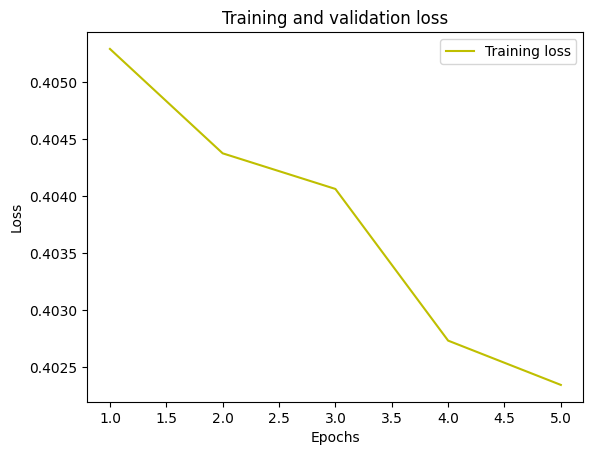

In [83]:
# cf. model.fit()이 리턴하는 또 다른 정보들
import matplotlib.pyplot as plt

loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()